In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import GridSearchCV

In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/DataMining/diabetes_prediction_dataset.csv')

# Display the first few rows of the dataset and its summary information
data.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
data.duplicated().sum()


3854

In [6]:
data = data.drop_duplicates()
print(f"Duplicate rows removed. New shape: {data.shape}")

Duplicate rows removed. New shape: (96146, 9)


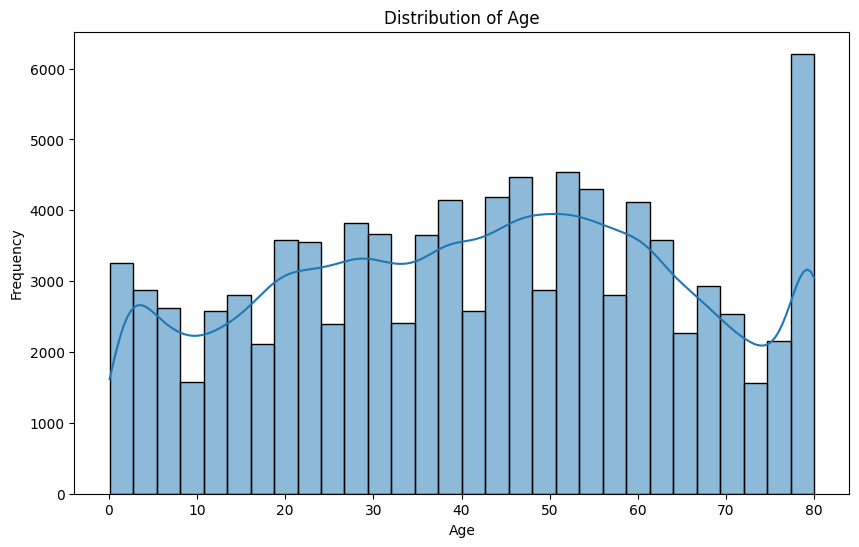

In [7]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

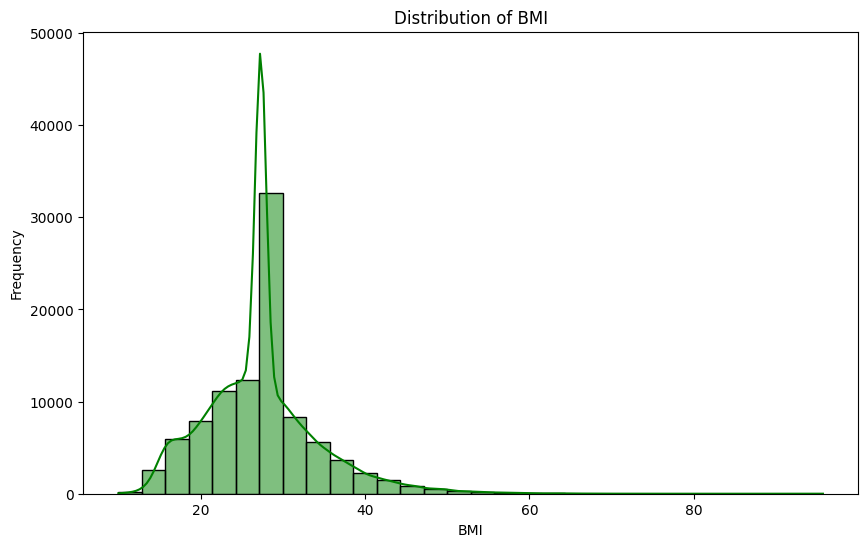

In [8]:
# Distribution of BMI
plt.figure(figsize=(10, 6))
sns.histplot(data['bmi'], bins=30, kde=True, color='green')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

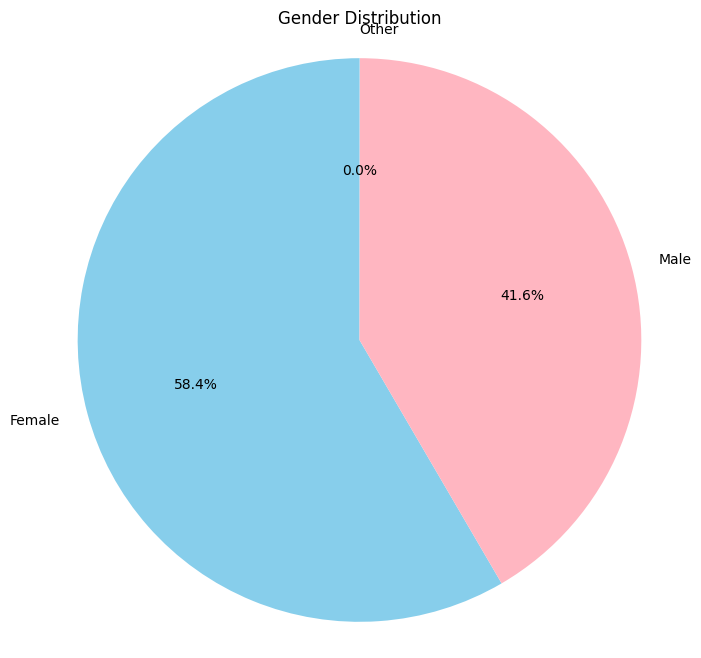

In [9]:
# Counting occurrences of each gender
gender_counts = data['gender'].value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightpink'])
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

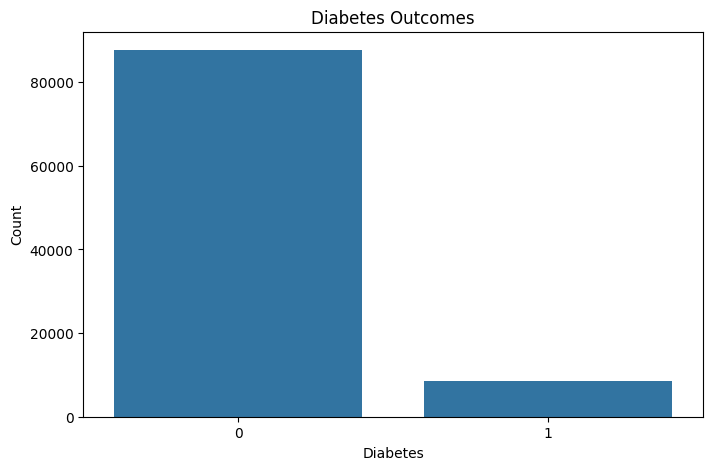

In [10]:
# Diabetes Outcomes
plt.figure(figsize=(8, 5))
sns.countplot(x='diabetes', data=data)
plt.title('Diabetes Outcomes')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

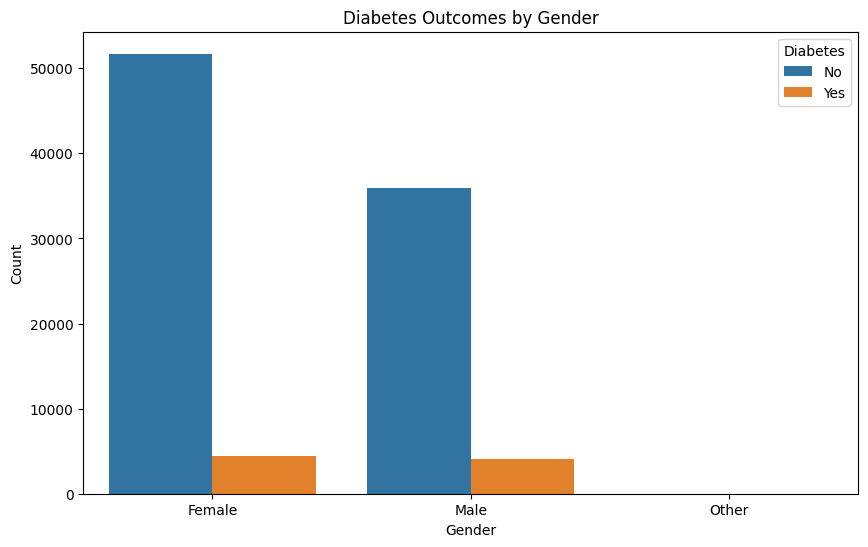

In [11]:
# Grouped Bar Chart
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='diabetes', data=data)
plt.title('Diabetes Outcomes by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Diabetes', labels=['No', 'Yes'])
plt.show()

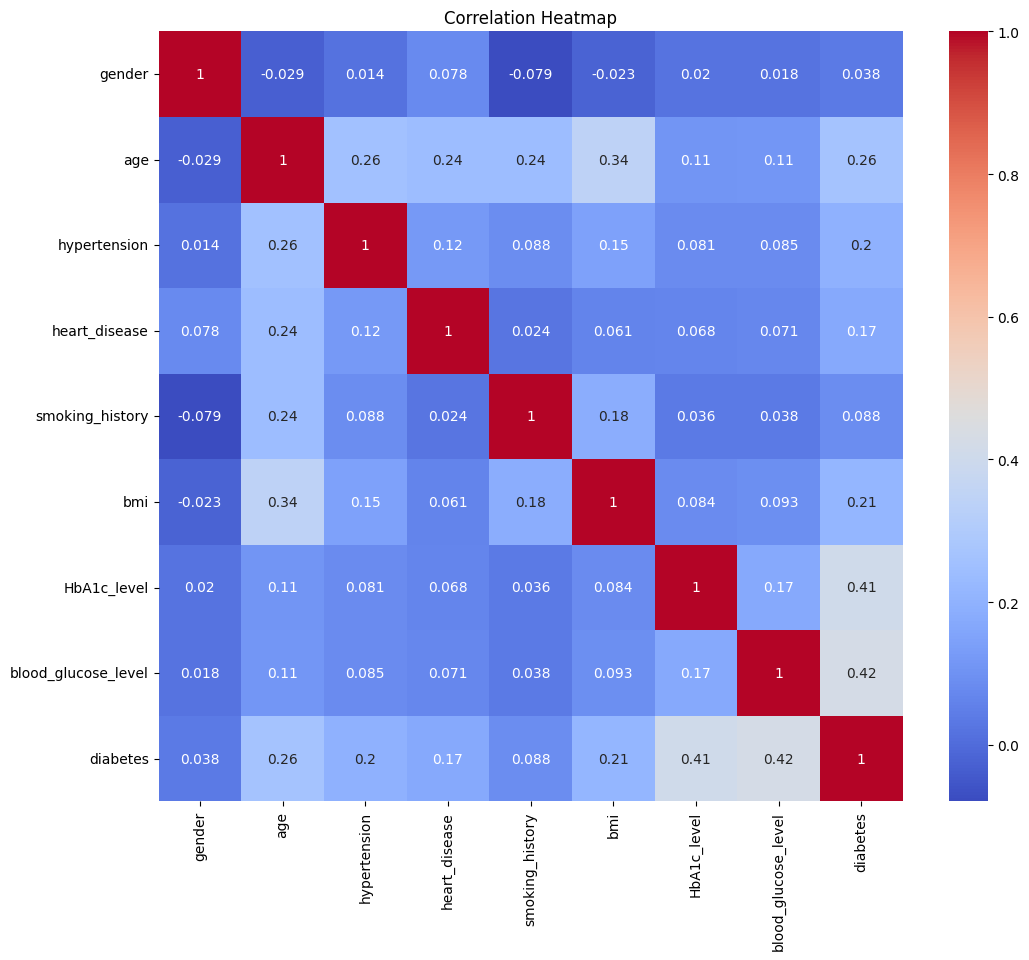

In [12]:
# Encode categorical data
label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

# Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [13]:
# # Pairplot to visualize the relationships between variables
# sns.pairplot(data, hue='diabetes')
# plt.title('Pairplot of Variables')
# plt.show()

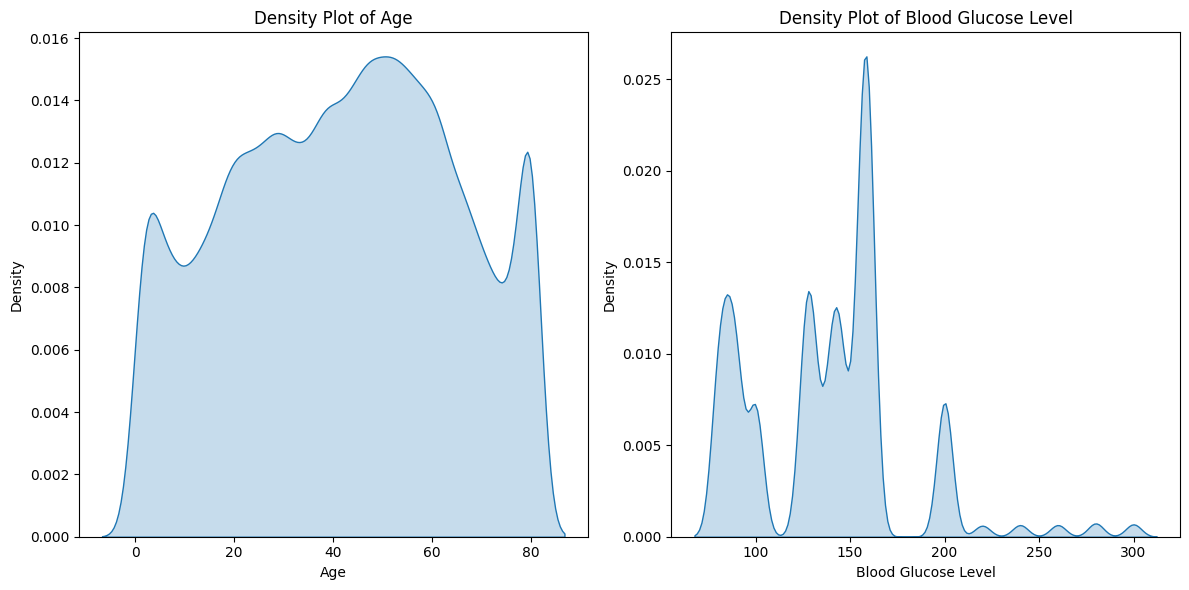

In [14]:
# Set up the figure for multiple plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Density Plot for Age
sns.kdeplot(data['age'], ax=axes[0], fill=True)
axes[0].set_title('Density Plot of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Density')

# Density Plot for Blood Glucose Level
sns.kdeplot(data['blood_glucose_level'], ax=axes[1], fill=True)
axes[1].set_title('Density Plot of Blood Glucose Level')
axes[1].set_xlabel('Blood Glucose Level')
axes[1].set_ylabel('Density')

# Show the plots
plt.tight_layout()
plt.show()

In [15]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/DataMining/diabetes_prediction_dataset.csv')

# Display the first few rows of the dataset and its summary information
data.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


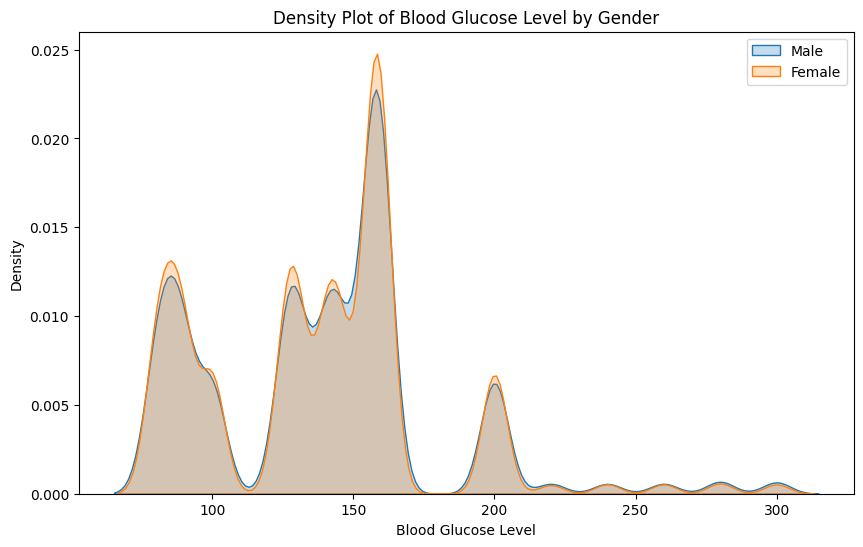

In [16]:

# Density Plot for Blood Glucose Level by Gender
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data[data['gender'] == 'Male']['blood_glucose_level'], label='Male', fill=True)
sns.kdeplot(data=data[data['gender'] == 'Female']['blood_glucose_level'], label='Female', fill=True)
plt.title('Density Plot of Blood Glucose Level by Gender')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Density')
plt.legend()
plt.show()
plt.show()



# Exploratory Data Analysis (EDA)|

In [17]:
import pandas as pd

print("Summary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Summary Statistics:
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5

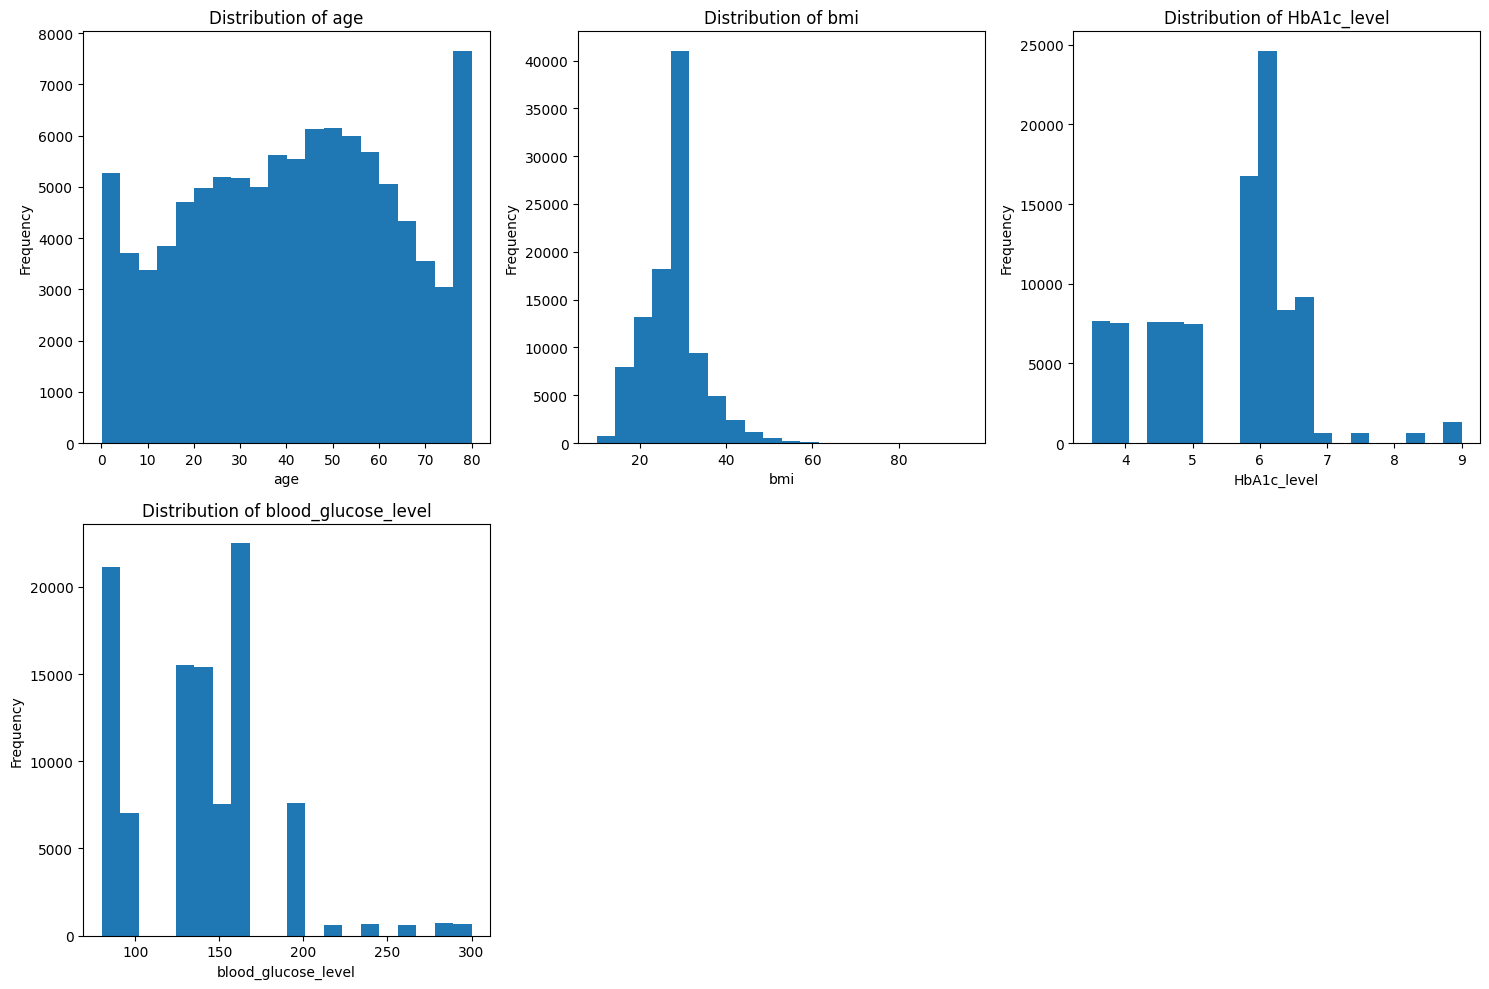

In [18]:
import matplotlib.pyplot as plt

# Identify numeric non-binary features
numeric_features = data.select_dtypes(include=np.number).columns
non_binary_features = [col for col in numeric_features if data[col].nunique() > 3]

# Calculate the number of rows and columns for subplots
num_rows = (len(non_binary_features) + 2) // 3  # Round up by adding 2 before integer division
num_cols = min(3, len(non_binary_features))

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.ravel()  # Flatten the axes array for easier iteration

# Plot histograms for each non-binary numeric feature
for i, feature in enumerate(non_binary_features):
    if i < len(axes):  # Handle case where there are more subplots than features
        axes[i].hist(data[feature], bins=20)  # Adjust bins as needed
        axes[i].set_title(f'Distribution of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and show plot
plt.tight_layout()
plt.show()


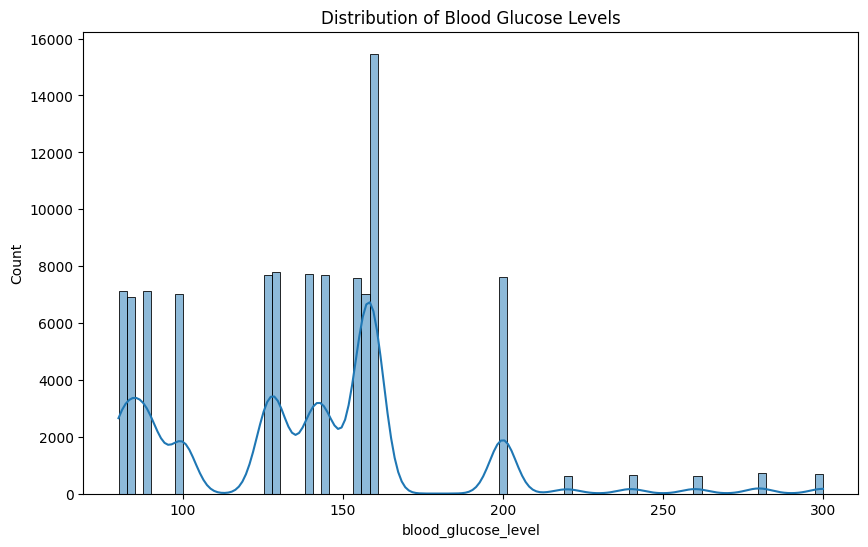

In [19]:
# Histogram of Blood Glucose Levels
plt.figure(figsize=(10, 6))
sns.histplot(data['blood_glucose_level'], kde=True)
plt.title('Distribution of Blood Glucose Levels')
plt.show()


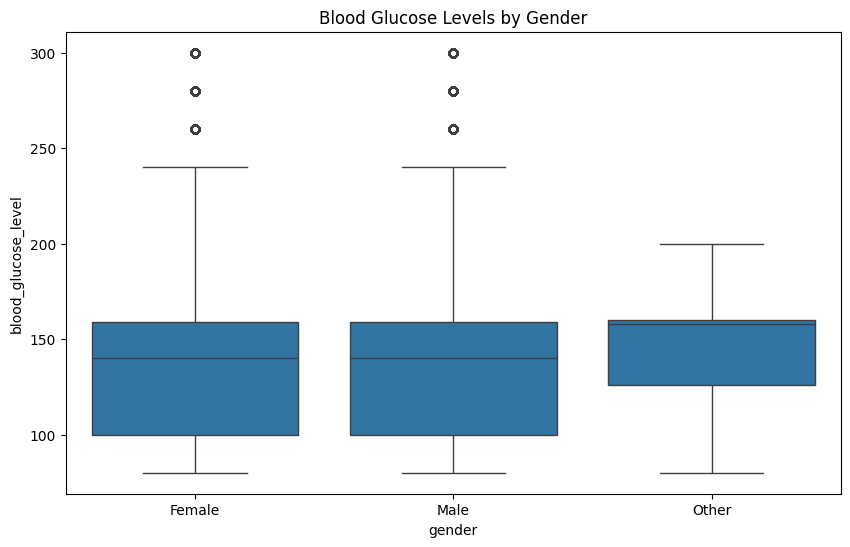

In [20]:
# Box plot for Age and Blood Glucose Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='blood_glucose_level', data=data)
plt.title('Blood Glucose Levels by Gender')
plt.show()

# Data Preprocessing

In [21]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/DataMining/diabetes_prediction_dataset.csv')

In [22]:
from sklearn.impute import SimpleImputer
# Check for missing values
print("Missing values before imputation:")
print(data.isnull().sum())

Missing values before imputation:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [23]:
import pandas as pd
from sklearn.utils import resample


original_counts = data['diabetes'].value_counts()

# Check class distribution in the target column (assuming 'Outcome' as the target column; modify if different)
print("Original class distribution:")
print(original_counts)

# Separate majority and minority classes (modify 'Outcome' to match your target column)
majority_class = data[data['diabetes'] == 0]
minority_class = data[data['diabetes'] == 1]

# Upsample minority class or downsample majority class to balance
# Here we'll use upsampling as an example
minority_upsampled = resample(minority_class,
                              replace=True,               # sample with replacement
                              n_samples=len(majority_class),  # match number of majority class
                              random_state=42)            # reproducible results

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([majority_class, minority_upsampled])

# Check class distribution after resampling
resampled_counts = data_upsampled['diabetes'].value_counts()

# Display new class distribution after resampling
print("\nClass distribution after resampling:")
print(resampled_counts)


Original class distribution:
diabetes
0    91500
1     8500
Name: count, dtype: int64

Class distribution after resampling:
diabetes
0    91500
1    91500
Name: count, dtype: int64


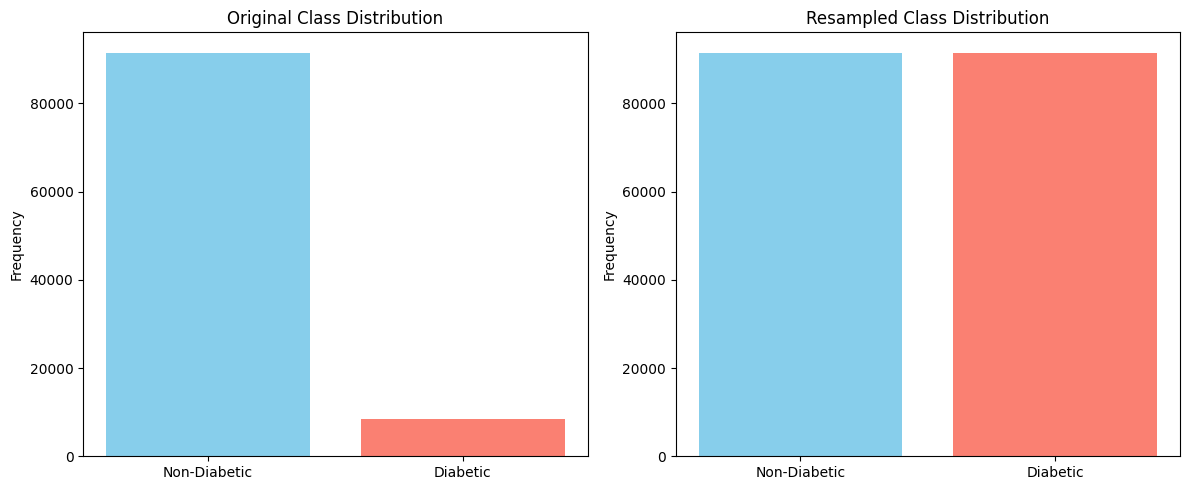

In [24]:
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Check class distribution after resampling
resampled_counts = data_upsampled['diabetes'].value_counts()

# Plotting the original and resampled distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original distribution
axes[0].bar(original_counts.index, original_counts.values, color=['skyblue', 'salmon'])
axes[0].set_title('Original Class Distribution')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Non-Diabetic', 'Diabetic'])
axes[0].set_ylabel('Frequency')

# Resampled distribution
axes[1].bar(resampled_counts.index, resampled_counts.values, color=['skyblue', 'salmon'])
axes[1].set_title('Resampled Class Distribution')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Non-Diabetic', 'Diabetic'])
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [25]:
print("Original dataset shape:", data.shape)
print("Resampled dataset shape:", data_upsampled.shape)

Original dataset shape: (100000, 9)
Resampled dataset shape: (183000, 9)


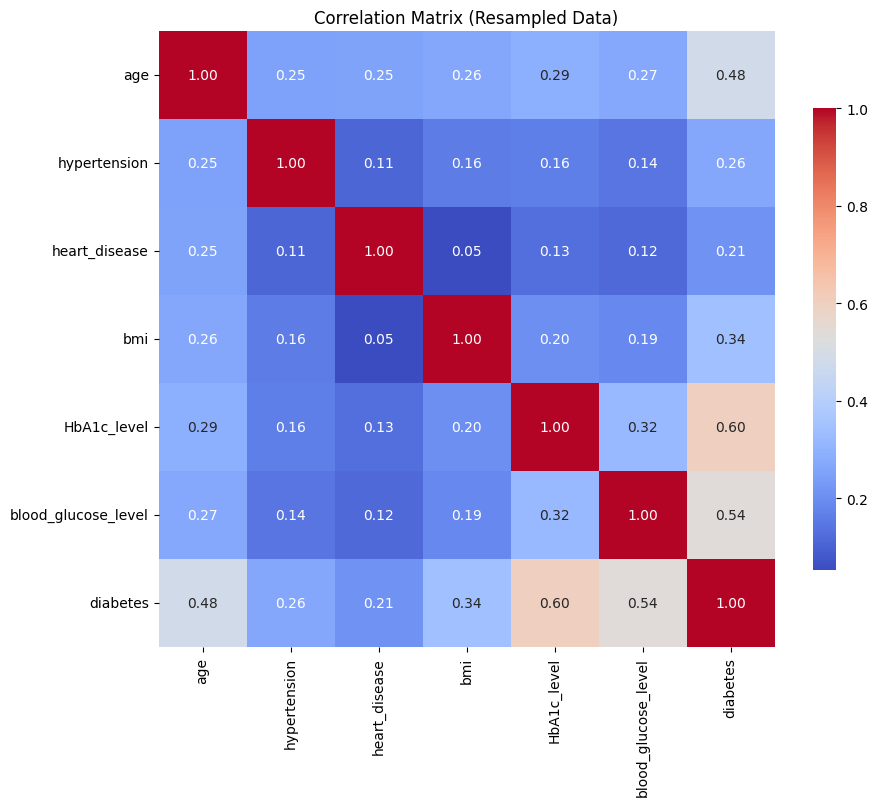

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns from the resampled dataset
numeric_data_upsampled = data_upsampled.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix = numeric_data_upsampled.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": 0.75})
plt.title('Correlation Matrix (Resampled Data)')
plt.show()



# Feature Scaling and Selection

In [27]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Use the resampled data
X = data_upsampled.drop('diabetes', axis=1)
y = data_upsampled['diabetes']

# Define categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessor for handling categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Logistic regression classifier
model = LogisticRegression(max_iter=1000)

# Pipeline including preprocessing, RFE, and classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rfe', RFE(estimator=model, n_features_to_select=5)),
    ('classifier', model)
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Extract the feature names after one-hot encoding
feature_names = preprocessor.transformers_[1][1].get_feature_names_out(categorical_cols)
all_feature_names = list(numeric_cols) + list(feature_names)  # Combining all feature names

# Get the RFE and the selected features
rfe = pipeline.named_steps['rfe']
selected_features = [all_feature_names[i] for i in range(len(rfe.support_)) if rfe.support_[i]]

# Print selected features
print('Selected features:', selected_features)


Selected features: ['hypertension', 'heart_disease', 'HbA1c_level', 'gender_Female', 'gender_Male']


age: 0.00493993445974791
hypertension: 0.09103207348198748
heart_disease: 0.07662034328902319
bmi: 0.008783316393804317
HbA1c_level: 0.15139976468163455
blood_glucose_level: 0.0027411530430010425
gender_Female: -0.0
gender_Male: 0.03448834582476263
gender_Other: -0.0
smoking_history_No Info: -0.04644688491420715
smoking_history_current: 0.0017255320883803027
smoking_history_ever: 0.0
smoking_history_former: 0.005468842216060615
smoking_history_never: -0.0024220830031902586
smoking_history_not current: -0.0


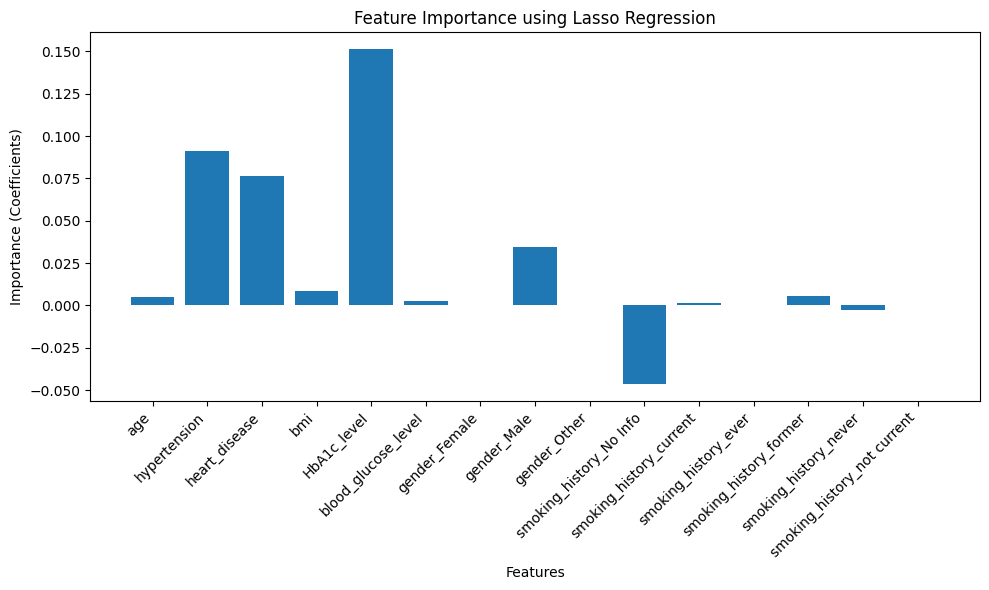

In [28]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Use the resampled data
X = data_upsampled.drop('diabetes', axis=1)
y = data_upsampled['diabetes']

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing pipeline to one-hot encode categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Create a pipeline with the preprocessor and Lasso regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lasso', Lasso(alpha=0.001))
])

# Fit the pipeline to the data
pipeline.fit(X, y)

# Get the Lasso model from the pipeline
lasso = pipeline.named_steps['lasso']

# Extract feature names after one-hot encoding
feature_names = list(numeric_cols) + list(pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_cols))

# Get feature importances (coefficients)
feature_importances = lasso.coef_

# Print feature importances
for feature_name, importance in zip(feature_names, feature_importances):
    print(f"{feature_name}: {importance}")

# Visualize the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importances)
plt.xlabel("Features")
plt.ylabel("Importance (Coefficients)")
plt.title("Feature Importance using Lasso Regression")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Model Selection

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define features and target from the resampled dataset
X = data_upsampled.drop('diabetes', axis=1)
y = data_upsampled['diabetes']

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create a preprocessor with ColumnTransformer for scaling numeric data and encoding categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])



In [30]:
# Generic Fnction for Model pipeline

def run_model_pipeline(model, X, y):
    """
    This function sets up a pipeline that preprocesses the data and then fits a model.
    It prints the classification report and ROC AUC score for model evaluation.
    """
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Create and configure pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Predictions and evaluations
    predictions = pipeline.predict(X_test)
    print(f"Model Performance for {model.__class__.__name__}:")
    print(classification_report(y_test, predictions))
    print("ROC AUC Score:", roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1]))
    print("\n")


    # Confusion Matrix Visualization
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {model.__class__.__name__}')
    plt.show()
    print("\n")


    # Compute the probabilities
    y_prob = pipeline.predict_proba(X_test)[:, 1]

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model.__class__.__name__}')
    plt.legend(loc="lower right")
    plt.show()

Model Performance for LogisticRegression:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88     22800
           1       0.89      0.88      0.88     22950

    accuracy                           0.88     45750
   macro avg       0.88      0.88      0.88     45750
weighted avg       0.88      0.88      0.88     45750

ROC AUC Score: 0.9624547519397623




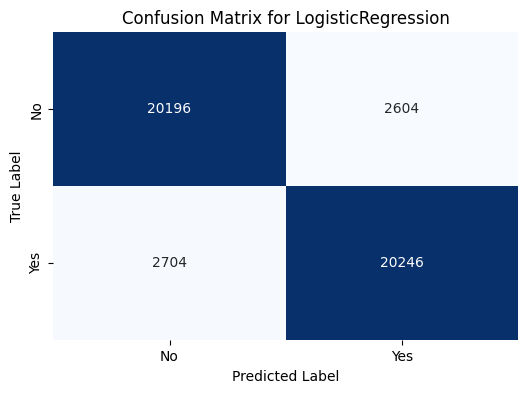

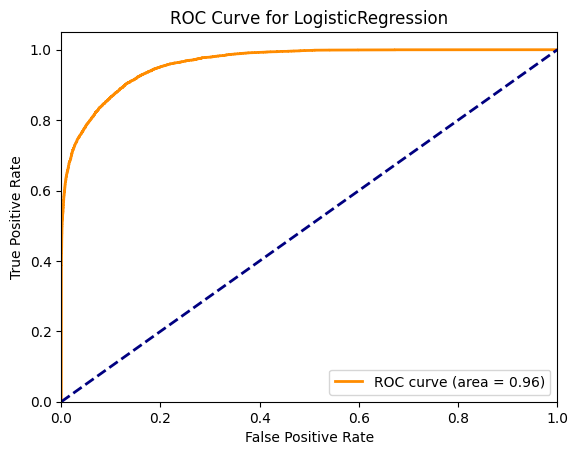

In [31]:
# Run Logistic Regression
run_model_pipeline(LogisticRegression(max_iter=1000), X, y)

Model Performance for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     22800
           1       0.97      1.00      0.98     22950

    accuracy                           0.98     45750
   macro avg       0.98      0.98      0.98     45750
weighted avg       0.98      0.98      0.98     45750

ROC AUC Score: 0.9844767333639108




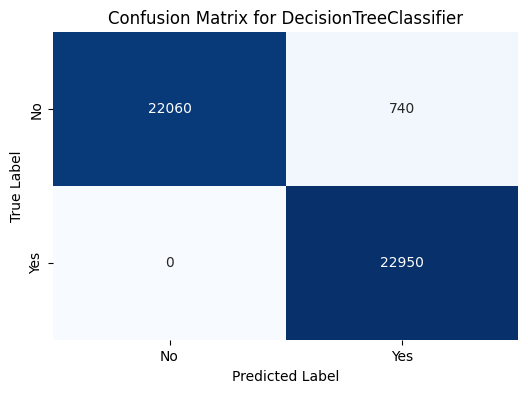

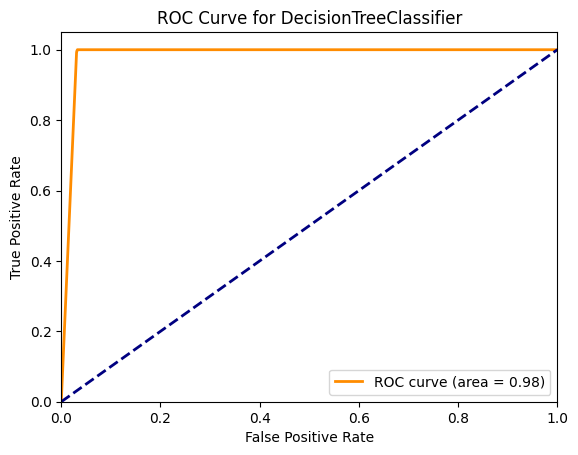

In [32]:
# Run Decision Tree
run_model_pipeline(DecisionTreeClassifier(), X, y)

Model Performance for RandomForestClassifier:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     22800
           1       0.98      1.00      0.99     22950

    accuracy                           0.99     45750
   macro avg       0.99      0.99      0.99     45750
weighted avg       0.99      0.99      0.99     45750

ROC AUC Score: 0.9994977716622712




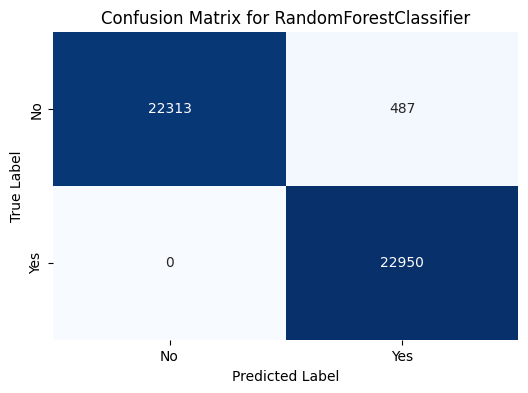

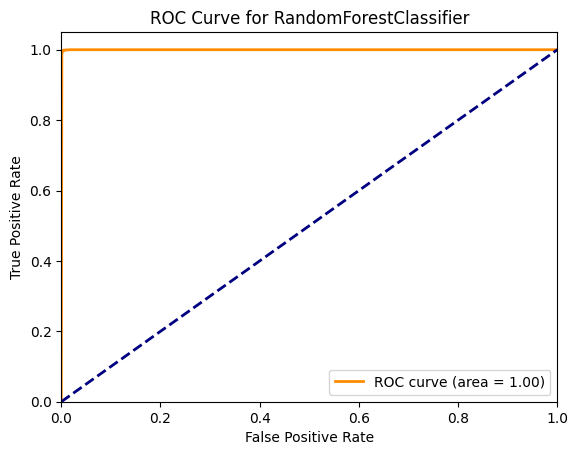

In [33]:
# Run Random Forest
run_model_pipeline(RandomForestClassifier(), X, y)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:00:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model Performance for XGBClassifier:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94     22800
           1       0.92      0.96      0.94     22950

    accuracy                           0.94     45750
   macro avg       0.94      0.94      0.94     45750
weighted avg       0.94      0.94      0.94     45750

ROC AUC Score: 0.9879870179260789




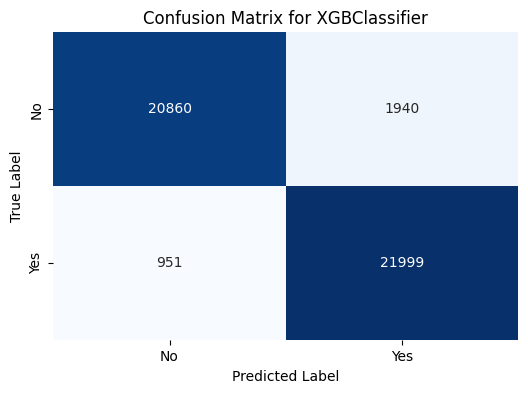

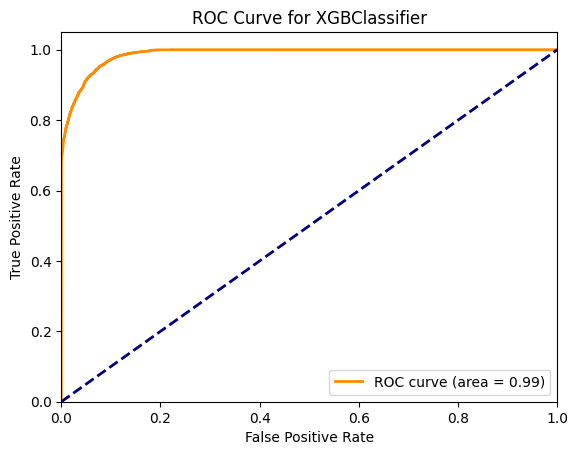

In [34]:
from xgboost import XGBClassifier

# Run XGBoost
run_model_pipeline(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), X, y)

In [35]:
# # Run SVM
# run_model_pipeline(SVC(probability=True), X, y)

# Neural Network

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
4290/4290 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8585 - loss: 0.3099 - val_accuracy: 0.8976 - val_loss: 0.2052
Epoch 2/50
4290/4290 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9000 - loss: 0.2115 - val_accuracy: 0.9068 - val_loss: 0.1874
Epoch 3/50
4290/4290 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9048 - loss: 0.1995 - val_accuracy: 0.9073 - val_loss: 0.1868
Epoch 4/50
4290/4290 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9054 - loss: 0.1973 - val_accuracy: 0.9068 - val_loss: 0.1845
Epoch 5/50
4290/4290 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9057 - loss: 0.1947 - val_accuracy: 0.9089 - val_loss: 0.1832
Epoch 6/50
4290/4290 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9076 - loss: 0.1934 - val_accuracy: 0.9085 - val_loss: 0.1839
Epoch 7/50
4290/4290 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9073 - loss: 0.1930 - val_accuracy: 0.9076 - val_loss: 0.1829
Epoch 8/50
4290/4290 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9066 - loss: 0.

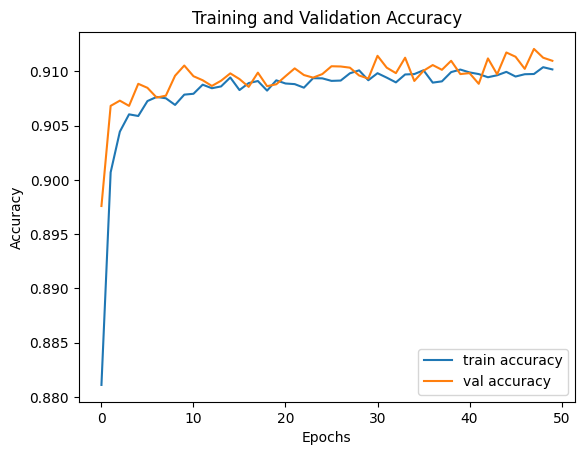

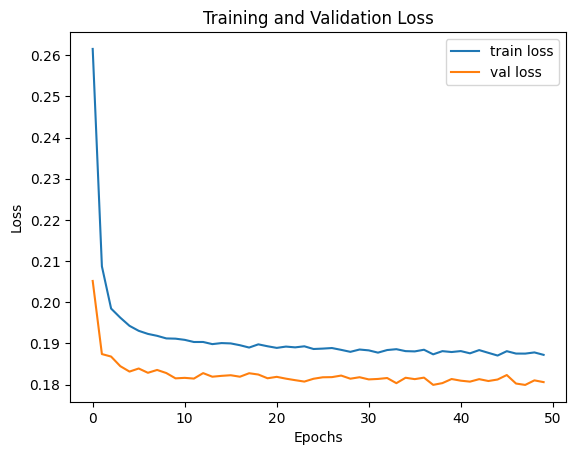

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Assuming 'data_upsampled' is your dataset with features and 'diabetes' as the target column
X = data_upsampled.drop('diabetes', axis=1)
y = data_upsampled['diabetes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create a ColumnTransformer to scale numeric data and one-hot encode categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Apply the transformations to the training and testing data
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Build a Sequential Neural Network model
model = Sequential()

# Input layer (with the correct input shape)
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.5))

# Hidden layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

# Output layer (binary classification: 0 or 1)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
y_pred_nn = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Confusion matrix and accuracy
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
acc_nn = accuracy_score(y_test, y_pred_nn)

print("Confusion Matrix (Neural Network):")
print(conf_matrix_nn)
print("\n")
print(f"Accuracy of Neural Network: {acc_nn * 100:.2f}%\n")
print("Classification Report (Neural Network):")
print(classification_report(y_test, y_pred_nn))

# Plotting the training history
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


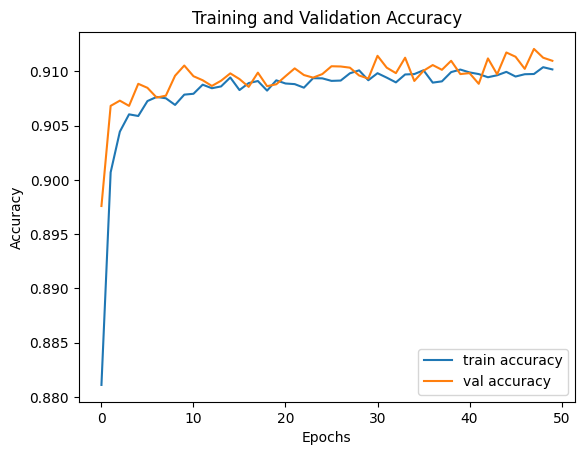

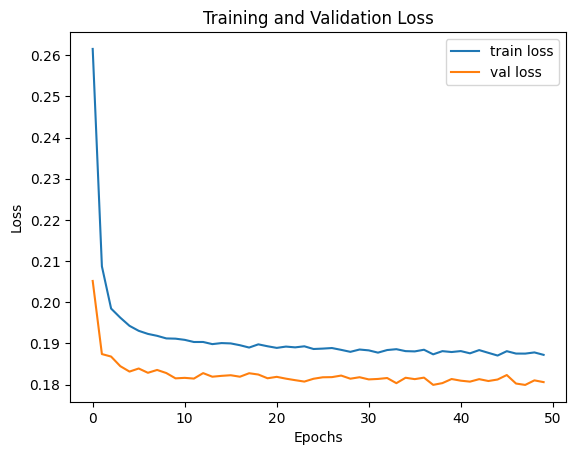

In [40]:
# Plotting the training history
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [42]:
!pip install pytorch-tabnet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 3.5 MB/s eta 0:00:00


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from pytorch_tabnet.tab_model import TabNetClassifier
import numpy as np

# Assuming 'data_upsampled' is your dataset with features and 'diabetes' as the target column
X = data_upsampled.drop('diabetes', axis=1)
y = data_upsampled['diabetes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create a ColumnTransformer to scale numeric data and one-hot encode categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Apply the transformations to the training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convert the labels to numpy arrays
y_train = y_train.values
y_test = y_test.values

# Initialize TabNet model
model = TabNetClassifier()

# Fit the model (TabNet works with numpy arrays)
model.fit(
    X_train_processed, y_train,
    eval_set=[(X_test_processed, y_test)],
    max_epochs=10,
    patience=5,
    batch_size=256,
    virtual_batch_size=128
)

# Predict and evaluate
y_pred = model.predict(X_test_processed)
print("Classification Report (TabNet):")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.23648 | val_0_auc: 0.97501 |  0:00:20s
epoch 1  | loss: 0.20295 | val_0_auc: 0.97563 |  0:00:37s
epoch 2  | loss: 0.20167 | val_0_auc: 0.9743  |  0:00:53s
epoch 3  | loss: 0.20079 | val_0_auc: 0.97468 |  0:01:09s
epoch 4  | loss: 0.19921 | val_0_auc: 0.97464 |  0:01:32s
epoch 5  | loss: 0.19777 | val_0_auc: 0.97612 |  0:01:57s
epoch 6  | loss: 0.19854 | val_0_auc: 0.97629 |  0:02:15s
epoch 7  | loss: 0.19796 | val_0_auc: 0.97684 |  0:02:31s
epoch 8  | loss: 0.19402 | val_0_auc: 0.97563 |  0:02:47s
epoch 9  | loss: 0.19393 | val_0_auc: 0.97614 |  0:03:11s
Stop training because you reached max_epochs = 10 with best_epoch = 7 and best_val_0_auc = 0.97684


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Classification Report (TabNet):
              precision    recall  f1-score   support

           0       0.93      0.87      0.90     22800
           1       0.88      0.93      0.91     22950

    accuracy                           0.90     45750
   macro avg       0.90      0.90      0.90     45750
weighted avg       0.90      0.90      0.90     45750



Classification Report (TabNet):
              precision    recall  f1-score   support

           0       0.93      0.87      0.90     22800
           1       0.88      0.93      0.91     22950

    accuracy                           0.90     45750
   macro avg       0.90      0.90      0.90     45750
weighted avg       0.90      0.90      0.90     45750

Confusion Matrix (TabNet):
[[19897  2903]
 [ 1525 21425]]


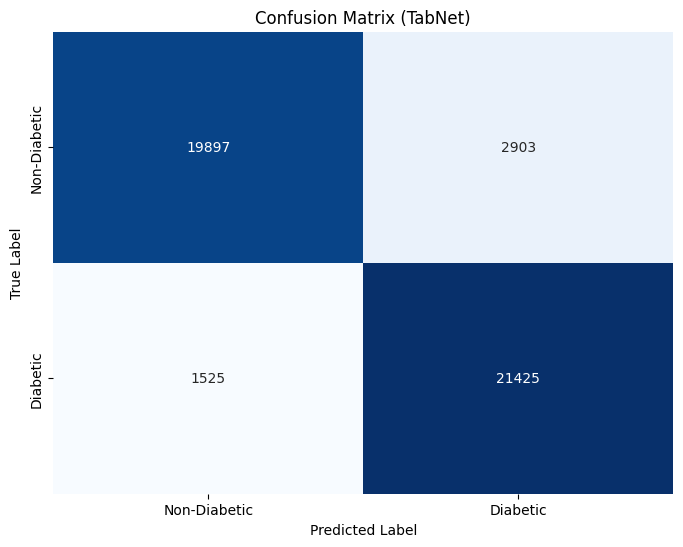

In [47]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict and evaluate
y_pred = model.predict(X_test_processed)

# Classification report
print("Classification Report (TabNet):")
print(classification_report(y_test, y_pred))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (TabNet):")
print(conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (TabNet)")
plt.show()


# Let try Recurrent Neural Network (RNN)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
4290/4290 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.8817 - loss: 0.2670 - val_accuracy: 0.8980 - val_loss: 0.2116
Epoch 2/30
4290/4290 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9037 - loss: 0.2034 - val_accuracy: 0.9071 - val_loss: 0.1902
Epoch 3/30
4290/4290 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9096 - loss: 0.1865 - val_accuracy: 0.9088 - val_loss: 0.1848
Epoch 4/30
4290/4290 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9110 - loss: 0.1832 - val_accuracy: 0.9081 - val_loss: 0.1834
Epoch 5/30
4290/4290 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9102 - loss: 0.1821 - val_accuracy: 0.9088 - val_loss: 0.1827
Epoch 6/30
4290/4290 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9118 - loss: 0.1799 - val_accuracy: 0.9109 - val_loss: 0.1810
Epoch 7/30
4290/4290 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9135 - loss: 0.1773 - val_accuracy: 0.9101 - val_loss: 0.1804
Epoch 8/30
4290/4290 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9112 - loss: 0.

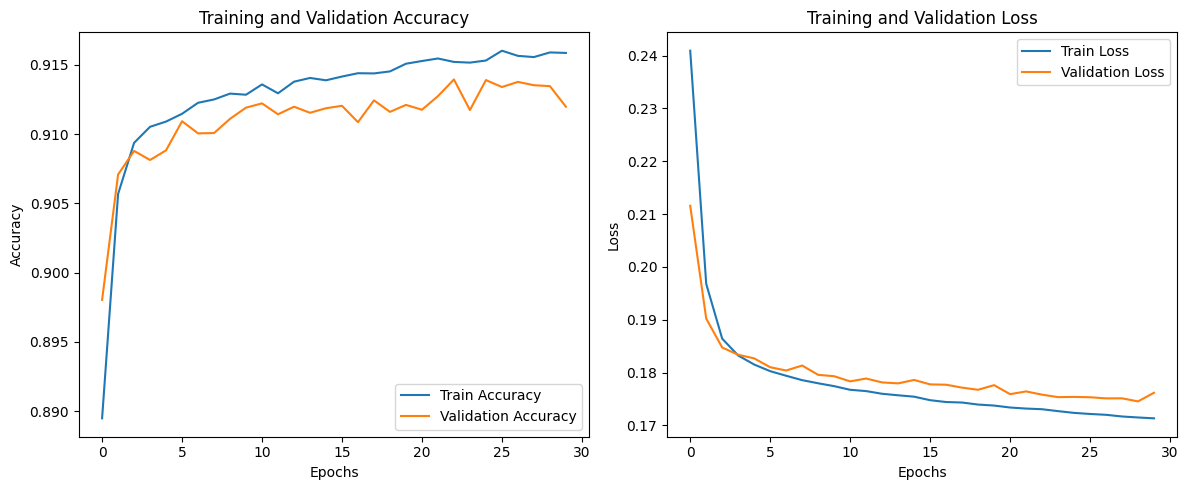

In [48]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Step 1: Reshape the data to 3D (samples, timesteps, features) for RNN input
X_train_rnn = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_rnn = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Step 2: Build the RNN model
model = Sequential()

# Add a SimpleRNN layer with 64 units
model.add(SimpleRNN(64, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))

# Add an output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Step 3: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(X_train_rnn, y_train, epochs=30, batch_size=32, validation_data=(X_test_rnn, y_test))

# Step 5: Evaluate the model
y_pred_rnn = (model.predict(X_test_rnn) > 0.5).astype("int32")

# Calculate and print accuracy and classification report
rnn_acc = accuracy_score(y_test, y_pred_rnn)
print(f"Accuracy of RNN: {rnn_acc * 100:.2f}%")
print("Classification Report for RNN:")
print(classification_report(y_test, y_pred_rnn))

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Adopting Data Mining Techniques

Feature Engineering

In [50]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial interaction features with degree=2
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Display the shape of the new datasets
print("Original feature count:", X_train_scaled.shape[1])
print("New feature count after polynomial features:", X_train_poly.shape[1])


Original feature count: 15
New feature count after polynomial features: 120


Feature Selection

In [51]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize the model and RFE with Logistic Regression as the base model
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=10)

# Fit RFE on the training data and transform both train and test sets
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)

# Display the selected features and feature ranking
print("Selected features (mask):", rfe.support_)
print("Feature ranking (1 = selected):", rfe.ranking_)

# List of selected features by name
selected_features = [f for f, selected in zip(range(X_train_scaled.shape[1]), rfe.support_) if selected]
print("Indices of selected features:", selected_features)


Selected features (mask): [ True  True  True  True  True  True False  True False  True  True  True
 False False False]
Feature ranking (1 = selected): [1 1 1 1 1 1 3 1 6 1 1 1 2 5 4]
Indices of selected features: [0, 1, 2, 3, 4, 5, 7, 9, 10, 11]


In [52]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Assuming you have a list of original feature names before scaling
# If using a ColumnTransformer, this could be obtained via get_feature_names_out if applicable
original_feature_names = preprocessor.get_feature_names_out()

# Initialize the model and RFE with Logistic Regression as the base model
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=10)

# Fit RFE on the training data and transform both train and test sets
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)

# Display the selected features and feature ranking
print("Selected features (mask):", rfe.support_)
print("Feature ranking (1 = selected):", rfe.ranking_)

# List of selected features by name
selected_feature_names = [name for name, selected in zip(original_feature_names, rfe.support_) if selected]
print("Selected feature names:", selected_feature_names)


Selected features (mask): [ True  True  True  True  True  True False  True False  True  True  True
 False False False]
Feature ranking (1 = selected): [1 1 1 1 1 1 3 1 6 1 1 1 2 5 4]
Selected feature names: ['num__age', 'num__hypertension', 'num__heart_disease', 'num__bmi', 'num__HbA1c_level', 'num__blood_glucose_level', 'cat__gender_Male', 'cat__smoking_history_No Info', 'cat__smoking_history_current', 'cat__smoking_history_ever']


In [53]:
from sklearn.decomposition import PCA

# Initialize PCA to reduce data to 2 components
pca = PCA(n_components=2)

# Fit PCA on training data and transform both train and test sets
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Display explained variance ratio and transformed data shape
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Shape of transformed data:", X_train_pca.shape)


Explained variance ratio: [0.28024967 0.13525392]
Shape of transformed data: (137250, 2)


Ensemble Learning

In [54]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize BaggingClassifier with Logistic Regression as the base estimator
bagging_clf = BaggingClassifier(estimator=LogisticRegression(), n_estimators=50, random_state=42)

# Fit the model on training data
bagging_clf.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_bagging = bagging_clf.predict(X_test_scaled)

# Calculate and print accuracy
bagging_acc = accuracy_score(y_test, y_pred_bagging)
print("Accuracy of Bagging Classifier:", bagging_acc * 100)


Accuracy of Bagging Classifier: 88.4
